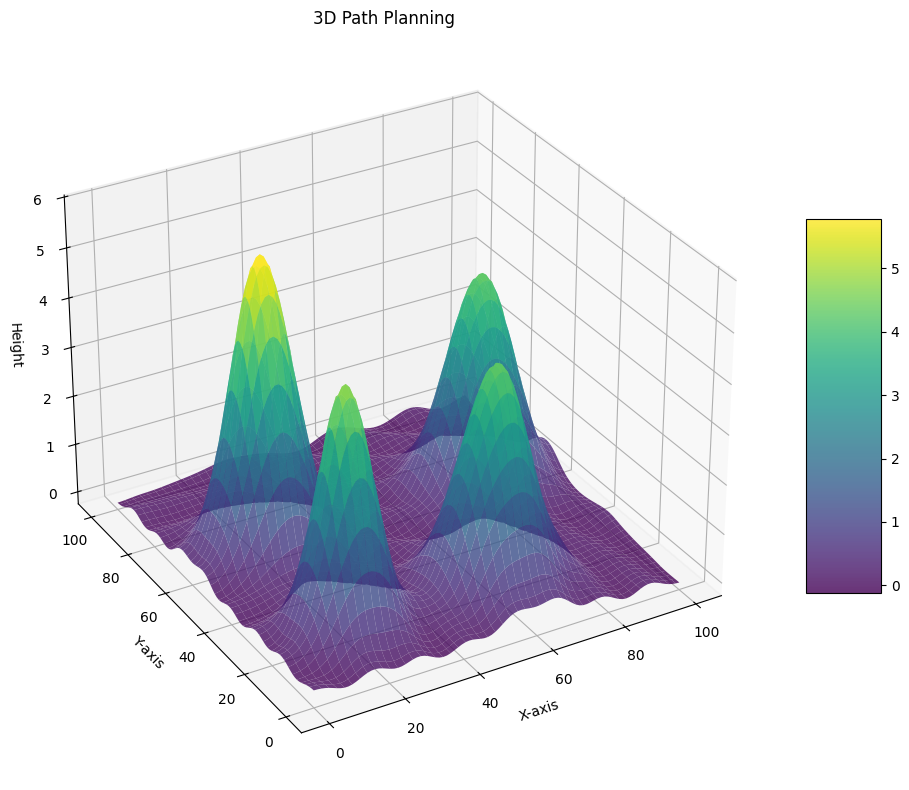

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy


def gaussian_peak(
    x_grid: np.ndarray,
    y_grid: np.ndarray,
    center_x: float,
    center_y: float,
    amplitude: float,
    width: float
) -> np.ndarray:
    """
    生成山峰的形状

    Args:
        x_grid (np.ndarray): X平面网格
        y_grid (np.ndarray): Y平面网格
        center_x (float): 山峰中心点的X坐标
        center_y (float): 山峰中心点的Y坐标
        amplitude (float): 山峰振幅
        width (float): 山峰宽度

    Returns:
        山峰在Z网格的坐标
    """
    return amplitude * np.exp(-((x_grid - center_x) ** 2 + (y_grid - center_y) ** 2) / (2 * width ** 2))


def plot_map() -> None:
    # 生成网格
    x = np.linspace(0, 100, 100)
    y = np.linspace(0, 100, 100)
    x_grid, y_grid = np.meshgrid(x, y)

    # 定义山峰的位置和参数
    peaks = [
        # center_x, center_y, amplitude, width
        (20, 20, 6, 6),
        (20, 60, 7, 7),
        (60, 20, 5, 8),
        (80, 60, 5, 8),
    ]

    # 生成基础地形
    z_grid = np.zeros_like(x_grid)

    # 添加山峰
    for (center_x, center_y, amplitude, width) in peaks:
        z_grid += gaussian_peak(x_grid, y_grid, center_x, center_y, amplitude, width)

    # 添加一些随机噪声和基础波动，增强山峰的真实性
    z_grid += 0.2 * np.sin(0.5 * np.sqrt(x_grid ** 2 + y_grid ** 2)) + 0.1 * np.random.normal(size=x_grid.shape)

    # 使用高斯滤波，保持山峰独立性的同时也保证平滑性
    z_grid = scipy.ndimage.gaussian_filter(z_grid, sigma=3)

    # 开始绘制地形和山峰
    figure = plt.figure(figsize=(10, 8))
    ax = figure.add_subplot(111, projection="3d")
    surface = ax.plot_surface(x_grid, y_grid, z_grid, cmap="viridis", alpha=0.8)
    figure.colorbar(surface, shrink=0.5, aspect=5)
    # 设置坐标轴信息
    ax.set_title("3D Path Planning")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Height")
    # elev参数控制仰角，azim参数控制方位角
    ax.view_init(elev=30, azim=240)
    plt.tight_layout()
    plt.show()


def three_dimensional_path_planning(x, y, z):
    return np.sqrt((x - 50) ** 2 + (y - 50) ** 2 + (z - 50) ** 2)


if __name__ == "__main__":
    plot_map()
